<a href="https://colab.research.google.com/github/vedasam-ch15/Google-Play-Store-Data-Analysis/blob/main/Topic_Modeling_apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm
#file and system operations
import os
import sys
assert sys.version_info >= (3,5)
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [8]:
full_data = pd.read_csv('/content/drive/MyDrive/design credits project/outputfile (1).csv')
full_data.head()

,appname,review-no,content,thumbsUpCount,score
0,ajio,1,This app showing 404 product not found error c...,0,1
1,ajio,2,Good 👍r response reasonable price,0,5
2,ajio,3,Very Good application to purchase appeal and f...,0,5
3,ajio,4,"I am trying to register, the app is asking for...",0,1
4,ajio,5,Isse ghatiya app maine na dekha h.. na hi dekh...,0,1


In [9]:
for (appname), group in full_data.groupby(['appname']):
     group.to_csv(f'{appname}.csv', index=False)
 
data = pd.read_csv('ajio.csv')
data.head()


,appname,review-no,content,thumbsUpCount,score
0,ajio,1,This app showing 404 product not found error c...,0,1
1,ajio,2,Good 👍r response reasonable price,0,5
2,ajio,3,Very Good application to purchase appeal and f...,0,5
3,ajio,4,"I am trying to register, the app is asking for...",0,1
4,ajio,5,Isse ghatiya app maine na dekha h.. na hi dekh...,0,1


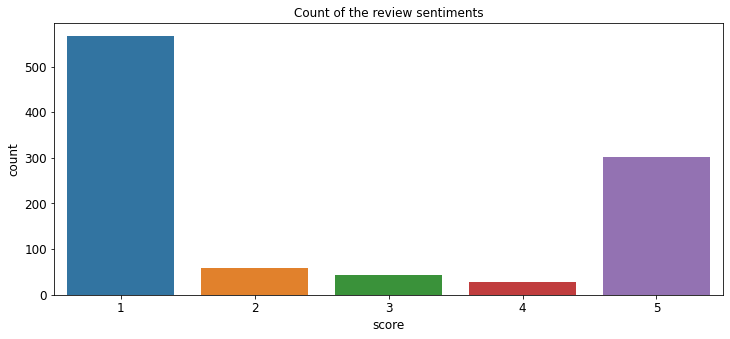

In [10]:
sns.countplot(data['score'])
plt.title('Count of the review sentiments')
plt.show()

In [6]:
#load the gensim library
import gensim
'''
Write a function to proprocess the entire dataset 
'''
stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    '''This function will lemmatize on Noun POS and stem the text'''
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='n'))
    #return (WordNetLemmatizer().lemmatize(text,pos='n'))

#tokenize and lemmatize
def preprocess(text):
    '''Function to break into word tokens, remove stopwords, remove short words and finally to lemmatize and stem the individual tokens'''
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
result = preprocess('The worst camera I have ever seen. Even my very old configuration mobile phone had a better camera resolution. Battery draining faster.')
print(result)

['worst', 'camera', 'seen', 'configur', 'mobil', 'phone', 'better', 'camera', 'resolut', 'batteri', 'drain', 'faster']


In [11]:
processed_docs = []

#uncomment below line to find the topics for a particular sentiment
#reviews = reviews[reviews['sentiment']==1]

for doc in data['content']:
    processed_docs.append(preprocess(doc))

In [12]:
'''
Create a dictionary of the words which appear in the entire corpus
'''
dictionary = gensim.corpora.Dictionary(processed_docs)

In [13]:
dictionary.filter_extremes(no_below=5,no_above=0.1,keep_n=None)

In [14]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [17]:

seed = 41
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=12,id2word=dictionary,passes=10,workers=2,
                                      random_state=seed,minimum_probability=0.05,alpha='symmetric')

In [18]:
for idx,topic in lda_model.print_topics(-1,num_words=15):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.100*"deliveri" + 0.078*"custom" + 0.052*"return" + 0.044*"care" + 0.042*"day" + 0.040*"worst" + 0.040*"support" + 0.033*"number" + 0.019*"refund" + 0.019*"respons" + 0.019*"credit" + 0.018*"ajio" + 0.018*"deliv" + 0.017*"late" + 0.016*"cash"


Topic: 1 
Words: 0.090*"problem" + 0.062*"solv" + 0.053*"super" + 0.047*"updat" + 0.037*"order" + 0.026*"bug" + 0.026*"issu" + 0.024*"say" + 0.023*"place" + 0.022*"worst" + 0.020*"page" + 0.018*"item" + 0.018*"payment" + 0.017*"scroll" + 0.016*"show"


Topic: 2 
Words: 0.080*"document" + 0.067*"show" + 0.045*"error" + 0.040*"upload" + 0.038*"time" + 0.035*"day" + 0.034*"account" + 0.030*"regist" + 0.025*"tri" + 0.024*"verifi" + 0.024*"unabl" + 0.019*"payment" + 0.019*"cart" + 0.017*"activ" + 0.016*"submit"


Topic: 3 
Words: 0.170*"slow" + 0.075*"work" + 0.057*"month" + 0.053*"excel" + 0.053*"execut" + 0.043*"compani" + 0.040*"respond" + 0.038*"sale" + 0.036*"improv" + 0.030*"offer" + 0.027*"proper" + 0.026*"bekar" + 0.023*"tim

In [19]:
#import Coherence model from gensim
from gensim.models import CoherenceModel
#compute coherence score
lda_model_coherence = CoherenceModel(model=lda_model,texts=processed_docs,dictionary=dictionary,
                                    coherence='c_v')
coherence_lda = lda_model_coherence.get_coherence()
print('\nCoherence Score:',coherence_lda)


Coherence Score: 0.38038722893737487


In [20]:
#define a helper function
def compute_coherence_score(corpus,dictionary,k,a):
    #instantiate the model instance based on k,a and b
    lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=dictionary,num_topics=k,alpha=a,
                                           passes=10,
                                           random_state=seed)
    lda_model_coherence = CoherenceModel(model=lda_model,texts=processed_docs,dictionary=dictionary,coherence='c_v')
    return lda_model_coherence.get_coherence()

In [21]:
#search for the best alpha and the number of topics --> one with the highest coherence score will be the best hyperparameter
alpha =['symmetric','asymmetric']

for x in alpha:
    print('Coherence Model with alpha = {}'.format(x))
    print('-------------------------------------------')
    print('\n')
    for i in range(5,10):
        score = compute_coherence_score(corpus=bow_corpus,dictionary=dictionary,k=i,a=x)        
        print(f'Coherence score with {i} topics is {score}')
        print('\n')

Coherence Model with alpha = symmetric
-------------------------------------------


Coherence score with 5 topics is 0.4145046814335499


Coherence score with 6 topics is 0.4104788438702293


Coherence score with 7 topics is 0.398974575767821


Coherence score with 8 topics is 0.3923602431089015


Coherence score with 9 topics is 0.4026869492184151


Coherence Model with alpha = asymmetric
-------------------------------------------


Coherence score with 5 topics is 0.3852754776260589


Coherence score with 6 topics is 0.42682790513053764


Coherence score with 7 topics is 0.40997506173054205


Coherence score with 8 topics is 0.3979925393973215


Coherence score with 9 topics is 0.3872633037603349




In [22]:
lda_model_final = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=6,id2word=dictionary,passes=10,workers=2,alpha='asymmetric')

In [23]:
from pprint import pprint
# Print the Keyword in the 7 topics
pprint(lda_model_final.print_topics())
doc_lda = lda_model_final[bow_corpus]

[(0,
  '0.054*"time" + 0.038*"work" + 0.037*"slow" + 0.034*"busi" + 0.030*"ajio" + '
  '0.028*"nice" + 0.027*"best" + 0.026*"experi" + 0.019*"worst" + '
  '0.018*"open"'),
 (1,
  '0.082*"product" + 0.073*"price" + 0.036*"qualiti" + 0.034*"retail" + '
  '0.034*"ajio" + 0.027*"wholesal" + 0.023*"busi" + 0.022*"market" + '
  '0.021*"applic" + 0.019*"like"'),
 (2,
  '0.095*"order" + 0.067*"deliveri" + 0.034*"nahi" + 0.031*"place" + '
  '0.029*"cancel" + 0.029*"day" + 0.027*"support" + 0.025*"worst" + '
  '0.022*"return" + 0.022*"poor"'),
 (3,
  '0.052*"sale" + 0.036*"ajio" + 0.033*"number" + 0.031*"respons" + '
  '0.030*"account" + 0.030*"mail" + 0.029*"busi" + 0.028*"respond" + '
  '0.025*"team" + 0.024*"help"'),
 (4,
  '0.101*"worst" + 0.044*"return" + 0.038*"custom" + 0.037*"problem" + '
  '0.029*"care" + 0.029*"refund" + 0.027*"manag" + 0.027*"product" + '
  '0.025*"busi" + 0.024*"document"'),
 (5,
  '0.060*"login" + 0.058*"regist" + 0.054*"unabl" + 0.054*"abl" + 0.052*"raha" '
  '+ 0.



*   Topic 1: Best experience with the app ajio but speed issues.
*   Topic 2: Order placement and cancellation issues
*   Topic 3: Order and delivery issues.
* Topic 4: Issues with the product help team (nobody responding).
* Topic 5: Return and Refund issues.
* Topic 6: Login and Registration issues

